### Decision Trees

### Assignment
#### Use a decision tree model to predict whether mushrooms are poisonous or edible. 
3. What are the factors that predict whether a mushroom is poisonous? 
4. Report the accuracy of your model on the training set and on the test set. How successful is the model - what is its precision and recall? 
5. What is the prevalence of poisonous mushrooms in the dataset? How might prevalence affect the positive and negative predictive values of a test/model?

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO 
# from IPython.display import Image 
# from pydot import graph_from_dot_data
import numpy as np

### Loading and Cleaning the data

In [2]:
data = pd.read_csv("agaricus-lepiota.data", header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# changing index cols with rename() 
data = data.rename(columns = {"0": "classes",  
                                "1": "cap_shape",
                                "2": "cap_surface",
                                "3": "cap_color",
                                "4": "bruises",
                                "5": "odor",
                                "6": "gill_attachment",
                                "7": "gill_spacing",
                                "8": "gill_size",
                                "9": "gill_color",
                                "10": "stalk_shape",
                                "11": "stalk_root",
                                "12": "stalk_surface_above_ring",
                                "13": "stalk_surface_below_ring",
                                "14": "stalk_color_above_ring",
                                "15": "stalk_color_below_ring",
                                "16": "veil_type",
                                "17": "veil_color",
                                "18": "ring_number",
                                "19": "ring_type",
                                "20": "spore_print_color",
                                "21": "population",
                                "22": "habitat"})

# changing columns using .columns() 
data.columns = ["classes", 
                "cap_shape", 
                "cap_surface",
                "cap_color",
                "bruises", 
                "odor", 
                "gill_attachment", 
                "gill_spacing", 
                "gill_size", 
                "gill_color", 
                "stalk_shape", 
                "stalk_root",
                "stalk_surface_above_ring", 
                "stalk_surface_below_ring", 
                "stalk_color_above_ring", 
                "stalk_color_below_ring", 
                "veil_type", 
                "veil_color", 
                "ring_number", 
                "ring_type", 
                "spore_print_color", 
                "population", 
                "habitat"]
data.columns

Index(['classes', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [5]:
data['classes']= ['poisonous' if each == 'p' else 'edible' for each in data['classes']]
data['cap_shape'] = data['cap_shape'].map({'x': "convex", 'b': "bell", 's': "sunken", 'f': "flat", 'k': "knobbed", 'c': "conical"})
data['cap_surface'] = data['cap_surface'].map({'s': "smooth", 'y': "scaly", 'f': "fibrous", 'g': "grooves"})
data['cap_color'] = data['cap_color'].map({'n': "brown", 'y': "yellow", 'w': "white", 'g': "gray", 'e': "red", 'p': "pink", 'b': "buff", 'u': "purple", 'c': "cinnamon", 'r': "green"})
data['bruises']= ['bruises' if each == 't' else 'no' for each in data['bruises']]
data['odor'] = data['odor'].map({'p': "pungent", 'a': "almond", 'l': "anise", 'n': "none", 'f': "foul", 'c': "creosote", 'y': "fishy", 's': "spicy", 'm': "musty"})
data['gill_attachment'] = data['gill_attachment'].map({'f': "free", 'a': "attached", 'd': "descending", 'n': "notched"})
data['gill_spacing'] = data['gill_spacing'].map({'c': "close", 'w': "crowded", 'd': "distant"})
data['gill_size']= ['narrow' if each == 'n' else 'broad' for each in data['gill_size']]
data['gill_color'] = data['gill_color'].map({'k': "black", 'n': "brown", 'g': "gray", 'p': "pink", 'w': "white", 'h': "chocolate", 'u': "purple", 'e': "red", 'b': "buff", 'r': "green", 'y': "yellow", 'o': "orange"})
data['stalk_shape']= ['enlarging' if each == 'e' else 'tapering' for each in data['stalk_shape']]
data['stalk_root'] = data['stalk_root'].map({'e': "equal", 'c': "club", 'b': "bulbous", 'r': "rooted", '?': "missing", 'u': "cup", 'z': "rhizomorphs"})
data['stalk_surface_above_ring'] = data['stalk_surface_above_ring'].map({'s': "smooth", 'f': "fibrous", 'k': "silky", 'y': "scaly"})
data['stalk_surface_below_ring'] = data['stalk_surface_below_ring'].map({'s': "smooth", 'f': "fibrous", 'y': "scaly", 'k': "silky"})
data['stalk_color_above_ring'] = data['stalk_color_above_ring'].map({'w': "white", 'g': "gray", 'p': "pink", 'n': "brown", 'b': "buff", 'e': "red", 'o': "orange", 'c': "cinnamon", 'y': "yellow"})
data['stalk_color_below_ring'] = data['stalk_color_below_ring'].map({'w': "white", 'p': "pink", 'g': "gray", 'b': "buff", 'n': "brown", 'e': "red", 'y': "yellow", 'o': "orange", 'c': "cinnamon"})
data['veil_type']= ['partial' if each == 'p' else 'universal' for each in data['veil_type']]
data['veil_color'] = data['veil_color'].map({'w': "white", 'n': "brown", 'o': "orange", 'y': "yellow"})
data['ring_number'] = data['ring_number'].map({'o': "one", 't': "two", 'n': "none"})
data['ring_type'] = data['ring_type'].map({'p': "pendant", 'e': "evanescent", 'l': "large", 'f': "flaring", 'n': "none", 's': "sheathing", 'z': "zone"})
data['spore_print_color'] = data['spore_print_color'].map({'k': "black", 'n': "brown", 'u': "purple", 'h': "chocolate", 'w': "white", 'r': "green", 'o': "orange", 'y': "yellow", 'b': "buff"})
data['population'] = data['population'].map({'s': "scattered", 'n': "numerous", 'a': "abundant", 'v': "several", 'y': "solitary", 'c': "clustered"})
data['habitat'] = data['habitat'].map({'u': "urban", 'g': "grasses", 'm': "meadows", 'd': "woods", 'p': "paths", 'w': "waste", 'l': "leaves"})


In [6]:
data.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [7]:
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [8]:
data.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


### 1. Split your data into train and test sets. 

In [9]:
# Creating the target variable for the test and training sets of data
X = data.drop('classes', axis = 1)
y = data["classes"]

# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 2. Get basic descriptive statistics for the training data and check for missing and incorrect or extreme values. Get scatterplots or heatmaps showing the relationship between the variables. 

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 5921 to 7270
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap_shape                 5686 non-null   int64
 1   cap_surface               5686 non-null   int64
 2   cap_color                 5686 non-null   int64
 3   bruises                   5686 non-null   int64
 4   odor                      5686 non-null   int64
 5   gill_attachment           5686 non-null   int64
 6   gill_spacing              5686 non-null   int64
 7   gill_size                 5686 non-null   int64
 8   gill_color                5686 non-null   int64
 9   stalk_shape               5686 non-null   int64
 10  stalk_root                5686 non-null   int64
 11  stalk_surface_above_ring  5686 non-null   int64
 12  stalk_surface_below_ring  5686 non-null   int64
 13  stalk_color_above_ring    5686 non-null   int64
 14  stalk_color_below_ring    5686 non-nu

In [11]:
X_train.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,...,5686.000000,5686.000000,5686.000000,5686.0,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.00000
mean,2.504221,1.743581,4.315512,0.584242,4.810763,0.973268,0.159163,0.306894,4.741998,0.570524,...,2.427190,5.436335,5.395709,0.0,1.964122,1.069996,2.282448,3.081428,3.646676,3.23039
std,0.900249,1.179579,3.442248,0.492896,1.969262,0.161314,0.365860,0.461246,3.361234,0.495045,...,0.870847,2.145969,2.180495,0.0,0.251182,0.274428,1.802978,2.825170,1.261372,2.53240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,0.000000,1.000000,3.000000,0.00000
50%,2.000000,2.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,1.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,3.00000
75%,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,6.00000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.00000


In [18]:
model = DecisionTreeClassifier()
mdl = model.fit(X_train, y_train)

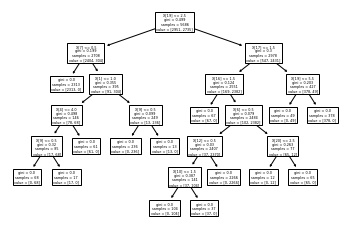

In [30]:
from sklearn import tree
tree.plot_tree(mdl);

In [26]:
import graphviz 
dot_data = tree.export_graphviz(mdl, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("agaricus_lepiota")

'agaricus_lepiota.pdf'

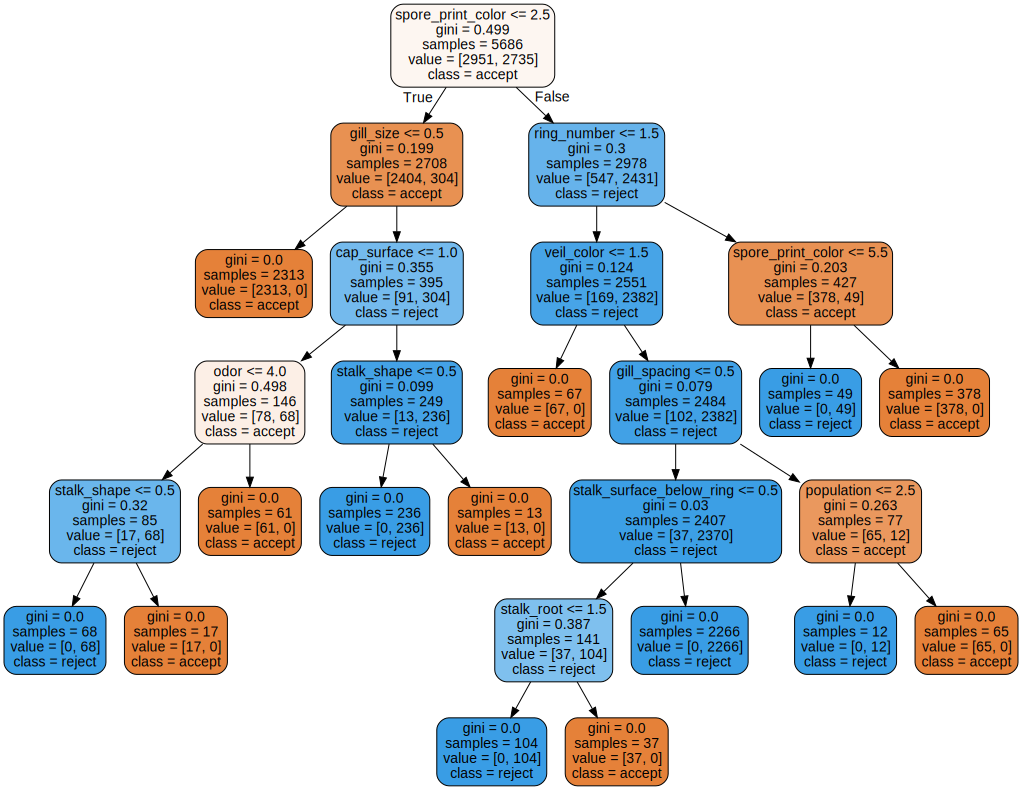

In [39]:
dot_data = tree.export_graphviz(mdl, out_file = None, feature_names = X_train.columns, 
                                class_names = ["accept", "reject"], filled = True, rounded = True)  
graph = graphviz.Source(dot_data)  
graph

In [13]:
print("Accuracy of logistic regression classifier: ", model.score(X_train, y_train))

Accuracy of logistic regression classifier:  1.0


In [14]:
# logreg to predict instances from the test set and store it
y_pred = model.predict(X_test)

# Printing the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

array([[1257,    0],
       [   0, 1181]])

In [15]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

# # y_true = # ground truth labels
# # y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()